**7 - PERFORMANCE ANALYSIS ON KNN CLASSIFICATION TECHNIQUE**

**DATE: 26-02-2024                              REG.NO: URK22AI1026**

AIM:

To demonstrate the performance metrics for the tree-based classification techniques used in data science applications.

DESCRIPTION:

K-nearest neighbors (KNN) algorithm is a type of supervised ML algorithm which can be
used for both classification as well as regression predictive problems. However, it is mainly
used for classification predictive problems in industry. The following two properties would
define KNN well:
- Lazy learning algorithm: KNN is a lazy learning algorithm because it does not have a
specialized training phase and uses all the data for training while classification.
- Non-parametric learning algorithm: KNN is also a non-parametric learning algorithm
because it doesn’t assume anything about the underlying data.
Working of KNN Algorithm
K-nearest neighbors (KNN) algorithm uses ‘feature similarity’ to predict the values of new
datapoints which further means that the new data point will be assigned a value based on how
closely it matches the points in the training set. We can understand its working with the help
of following steps:

Step1: For implementing any algorithm, we need dataset. So, during the first step of KNN, load the training as well as test data.

Step2: Choose the value of K i.e. the nearest data points. K can be any integer.

Step3: For each point in the test data do the following:

3.1: Calculate the distance between test data and each row of training data with the help of any of the method namely: Euclidean, Manhattan or Hamming distance. The most commonly used method to calculate distance is Euclidean.

3.2: Now, based on the distance value, sort them in ascending order.

3.3: Next, it will choose the top K rows from the sorted array.

3.4: Now, it will assign a class to the test point based on most frequent class of these rows.

Step4: End Performance Metrics for Classification Problems
Various performance metrics that can be used to evaluate predictions for classification problems are given below

Confusion Matrix
It is the easiest way to measure the performance of a classification problem where the output can be of two or more type of classes. A confusion matrix is nothing but a table with two dimensions viz.“Actual” and“Predicted” and furthermore, both the dimensions have “True Positives (TP)”, “True Negatives (TN)”, “False Positives (FP)”, “False Negatives (FN)”

Classification Accuracy

It is most common performance metric for classification algorithms. It may be defined as the number of correct predictions made as a ratio of all predictions made.

Classification Report

This report consists of the scores of Precisions, Recall, F1 and Support.
Precision, used in document retrievals, may be defined as the number of
correct documents returned by classification model.

AUC (Area Under ROC curve)

AUC (Area Under Curve)-ROC (Receiver Operating Characteristic) is a performance metric, based on varying threshold values, for classification problems. As name suggests, ROC is a probability curve and AUC measure the separability. In simple words, AUC-ROC
metric will tell us about the capability of model in distinguishing the classes. Higher the AUC, better the model. Mathematically, it can be created by plotting TPR (True Positive Rate) i.e.
Sensitivity or recall vs FPR (False Positive Rate) i.e. 1-Specificity, at various threshold values.

roc_auc_score function of sklearn.metrics is used to compute AUC-ROC.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('Social_Network.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15668575,0,26,43000,No
1,15603246,0,27,57000,No
2,15598044,0,27,84000,No
3,15727311,0,35,65000,No
4,15570769,0,26,80000,No
...,...,...,...,...,...
395,15672330,1,47,34000,Yes
396,15807837,1,48,33000,Yes
397,15592570,1,47,23000,Yes
398,15635893,1,60,42000,Yes


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
print(df.shape)

(400, 5)


In [ ]:
#Extracting dependant variables
Y=df.iloc[:,4]
print(Y.head())

0    No
1    No
2    No
3    No
4    No
Name: Purchased, dtype: object


In [ ]:
#Extracting dependant variables
x=df.iloc[:,1:4]
print(x.head())

   Gender  Age  EstimatedSalary
0       0   26            43000
1       0   27            57000
2       0   27            84000
3       0   35            65000
4       0   26            80000


In [ ]:
#encode the values
le=LabelEncoder()
Y=le.fit_transform(Y)
print(Y)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
#spliting the dataset into training and testing dataset
x_train,x_test,Y_train,Y_test=train_test_split(x,Y,test_size=0.25)

In [ ]:
#memorize the data
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,Y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
#predicting result with testing datasets
y_pred=knn.predict(x_test)

In [ ]:
#evaluating model with confusion matrix
conf_matrix=confusion_matrix(Y_test,y_pred)
print(conf_matrix)

[[53 11]
 [14 22]]


In [ ]:
#evaluating model with performance matrix
print("Accuracy",accuracy_score(Y_test,y_pred))
print("Recall",recall_score(Y_test,y_pred,pos_label=1))
print("Specificity",recall_score(Y_test,y_pred,pos_label=0))
print("Precision",precision_score(Y_test,y_pred))
print("Fscore",f1_score(Y_test,y_pred))

Accuracy 0.75
Recall 0.6111111111111112
Specificity 0.828125
Precision 0.6666666666666666
Fscore 0.6376811594202899


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

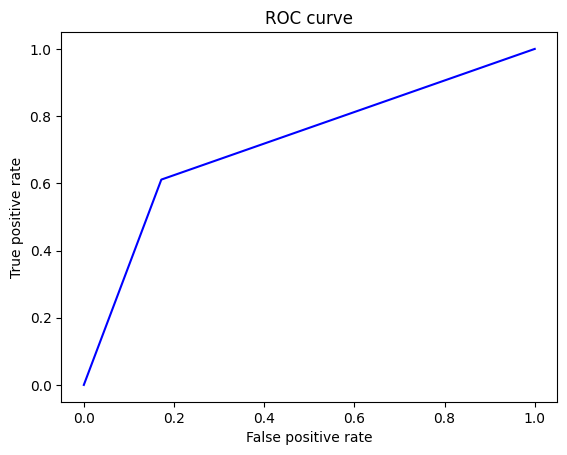

AUC score: 0.7196180555555556
[0.         0.61111111 1.        ] [0.       0.171875 1.      ]


In [ ]:
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
auc_score = roc_auc_score(Y_test, y_pred)

plt.plot(fpr, tpr, linestyle="-", color="blue")
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

print("AUC score:", auc_score)
print(tpr,fpr)

In [ ]:
#memorize the data
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,Y_train)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
#predicting result with testing datasets
y_pred=knn.predict(x_test)
y_pred

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1])

In [ ]:
#evaluating model with confusion matrix
conf_matrix=confusion_matrix(Y_test,y_pred)
print(conf_matrix)

[[55  9]
 [14 22]]


In [ ]:
#evaluating model with performance matrix
print("Accuracy",accuracy_score(Y_test,y_pred))
print("Recall",recall_score(Y_test,y_pred,pos_label=1))
print("Specificity",recall_score(Y_test,y_pred,pos_label=0))
print("Precision",precision_score(Y_test,y_pred))
print("Fscore",f1_score(Y_test,y_pred))

Accuracy 0.77
Recall 0.6111111111111112
Specificity 0.859375
Precision 0.7096774193548387
Fscore 0.6567164179104478


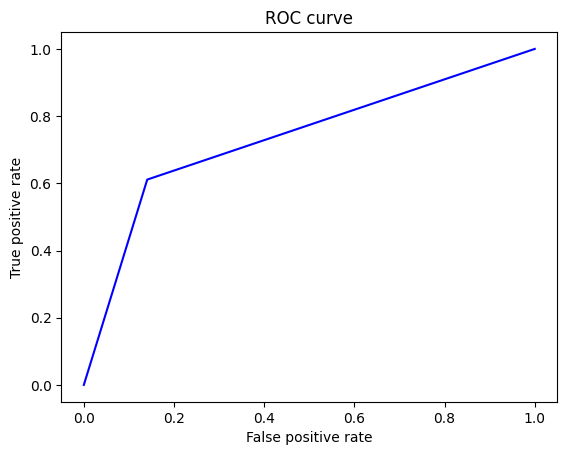

AUC score: 0.7352430555555556
[0.         0.61111111 1.        ] [0.       0.140625 1.      ]


In [ ]:
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
auc_score = roc_auc_score(Y_test, y_pred)

plt.plot(fpr, tpr, linestyle="-", color="blue")
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

print("AUC score:", auc_score)
print(tpr,fpr)

RESULT:
To demonstrate the performance metrics for the tree-based classification techniques used in data science applications 
IS executed successfullly.
